In [ ]:
#TODO Dataset description. WHat does each feature mean?

  Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                 A. Morin                      Agua Grande  1876   
1                 A. Morin                            Kpime  1676   
2                 A. Morin                           Atsane  1676   
3                 A. Morin                            Akata  1680   
4                 A. Morin                           Quilla  1704   

   Review Date Cocoa Percent Company Location  Rating Bean Type  \
0         2016           63%           France    3.75             
1         2015           70%           France    2.75             
2         2015           70%           France    3.00             
3         2015           70%           France    3.50             
4         2015           70%           France    3.50             

  Broad Bean Origin  
0          Sao Tome  
1              Togo  
2              Togo  
3              Togo  
4              Peru  


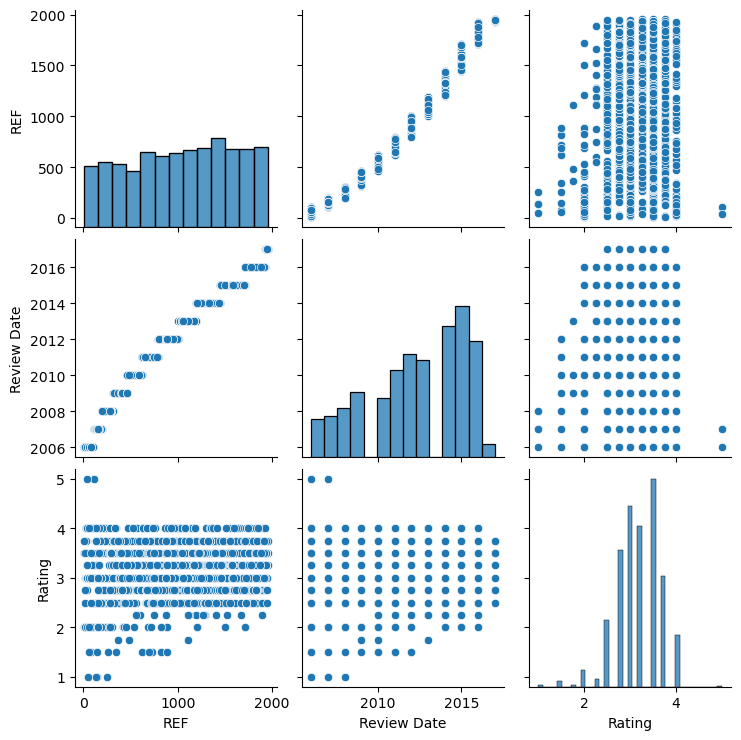

In [63]:
import pandas as pd
import seaborn as sns

#import dataset
df = pd.read_csv('flavors_of_cacao_mod.csv')
print(df.head())

#pair plot graphs
sns.pairplot(df)
#Make correlation matrix graph and other graphs for EDA
#TODO





In [ ]:
#Note down correlation observations from the correlation matrix. Include anything else that may be interesting
#TODO

In [65]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao_mod.csv')

category_counts = df['Company Location'].value_counts(normalize=True) * 100

print(category_counts)

#print(category_counts < 0.5)

Company Location
U.S.A.               42.562674
France                8.690808
Canada                6.963788
U.K.                  5.348189
Italy                 3.509749
Ecuador               3.008357
Australia             2.729805
Belgium               2.228412
Switzerland           2.116992
Germany               1.949861
Austria               1.448468
Spain                 1.392758
Colombia              1.281337
Hungary               1.225627
Venezuela             1.114206
Japan                 0.947075
Brazil                0.947075
Peru                  0.947075
Madagascar            0.947075
New Zealand           0.947075
Denmark               0.835655
Vietnam               0.612813
Scotland              0.557103
Guatemala             0.557103
Israel                0.501393
Costa Rica            0.501393
Argentina             0.501393
Poland                0.445682
Lithuania             0.334262
Honduras              0.334262
South Korea           0.278552
Nicaragua             

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('flavors_of_cacao_mod.csv')

df['Cocoa Percent'] = pd.to_numeric(df['Cocoa Percent'].str.replace('%', ''))

print(df.columns[[0, 1, 7]])
loc_df = df.drop(df.columns[[0, 1, 7, 8]], axis = 1)
bean_df = df.drop(df.columns[[0, 1, 5, 7]], axis = 1)

cut_df = loc_df

regions = {'NA':['U.S.A.', 'Canada', 'Mexico'], 
           'CA': ['Costa Rica', 'Honduras', 'Nicaragua', 'Guatemala', 'Domincan Republic', 'Puerto Rico', 'Grenada', 'St. Lucia', 'Martinique', 'Niacragua'],
           'SA':['Ecuador', 'Colombia', 'Venezuela', 'Brazil', 'Peru', 'Guatemala', 'Argentina', 'Bolivia', 'Chile', 'Eucador', 'Suriname'],
           'EEU':['Russia', 'Hungary', 'Lithuania', 'Sweden', 'Finland', 'Czech Republic'],
           'MEU':['Italy', 'Switzerland', 'Germany', 'Poland', 'Austria',],
           'WEU':['France', 'U.K.', 'Belgium', 'Spain', 'Denmark', 'Scotland', 'Ireland', 'Netherlands', 'Amsterdam', 'Iceland', 'Portugal', 'Wales'],
           'AF':['Israel', 'Madagascar', 'Sao Tome', 'South Africa', 'Ghana'],
           'AS':['Japan', 'Vietnam', 'South Korea', 'Singapore', 'Philippines', 'India'],
           'OC':['Australia', 'New Zealand', 'Fiji']}

for region, countries in regions.items():
    for i in countries:
        cut_df['Company Location'] = cut_df['Company Location'].replace(i, region)

print(f"Original data : \n{cut_df}")
categorical_columns = cut_df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(cut_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([cut_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Index(['Company (Maker-if known)', 'Specific Bean Origin or Bar Name',
       'Bean Type'],
      dtype='object')
Original data : 
       REF  Review Date  Cocoa Percent Company Location  Rating
0     1876         2016           63.0              WEU    3.75
1     1676         2015           70.0              WEU    2.75
2     1676         2015           70.0              WEU    3.00
3     1680         2015           70.0              WEU    3.50
4     1704         2015           70.0              WEU    3.50
...    ...          ...            ...              ...     ...
1790   647         2011           70.0              MEU    3.75
1791   749         2011           65.0              MEU    3.00
1792   749         2011           65.0              MEU    3.50
1793   781         2011           62.0              MEU    3.25
1794   486         2010           65.0              MEU    3.00

[1795 rows x 5 columns]
Encoded Employee data : 
       REF  Review Date  Cocoa Percent  Rating  Com

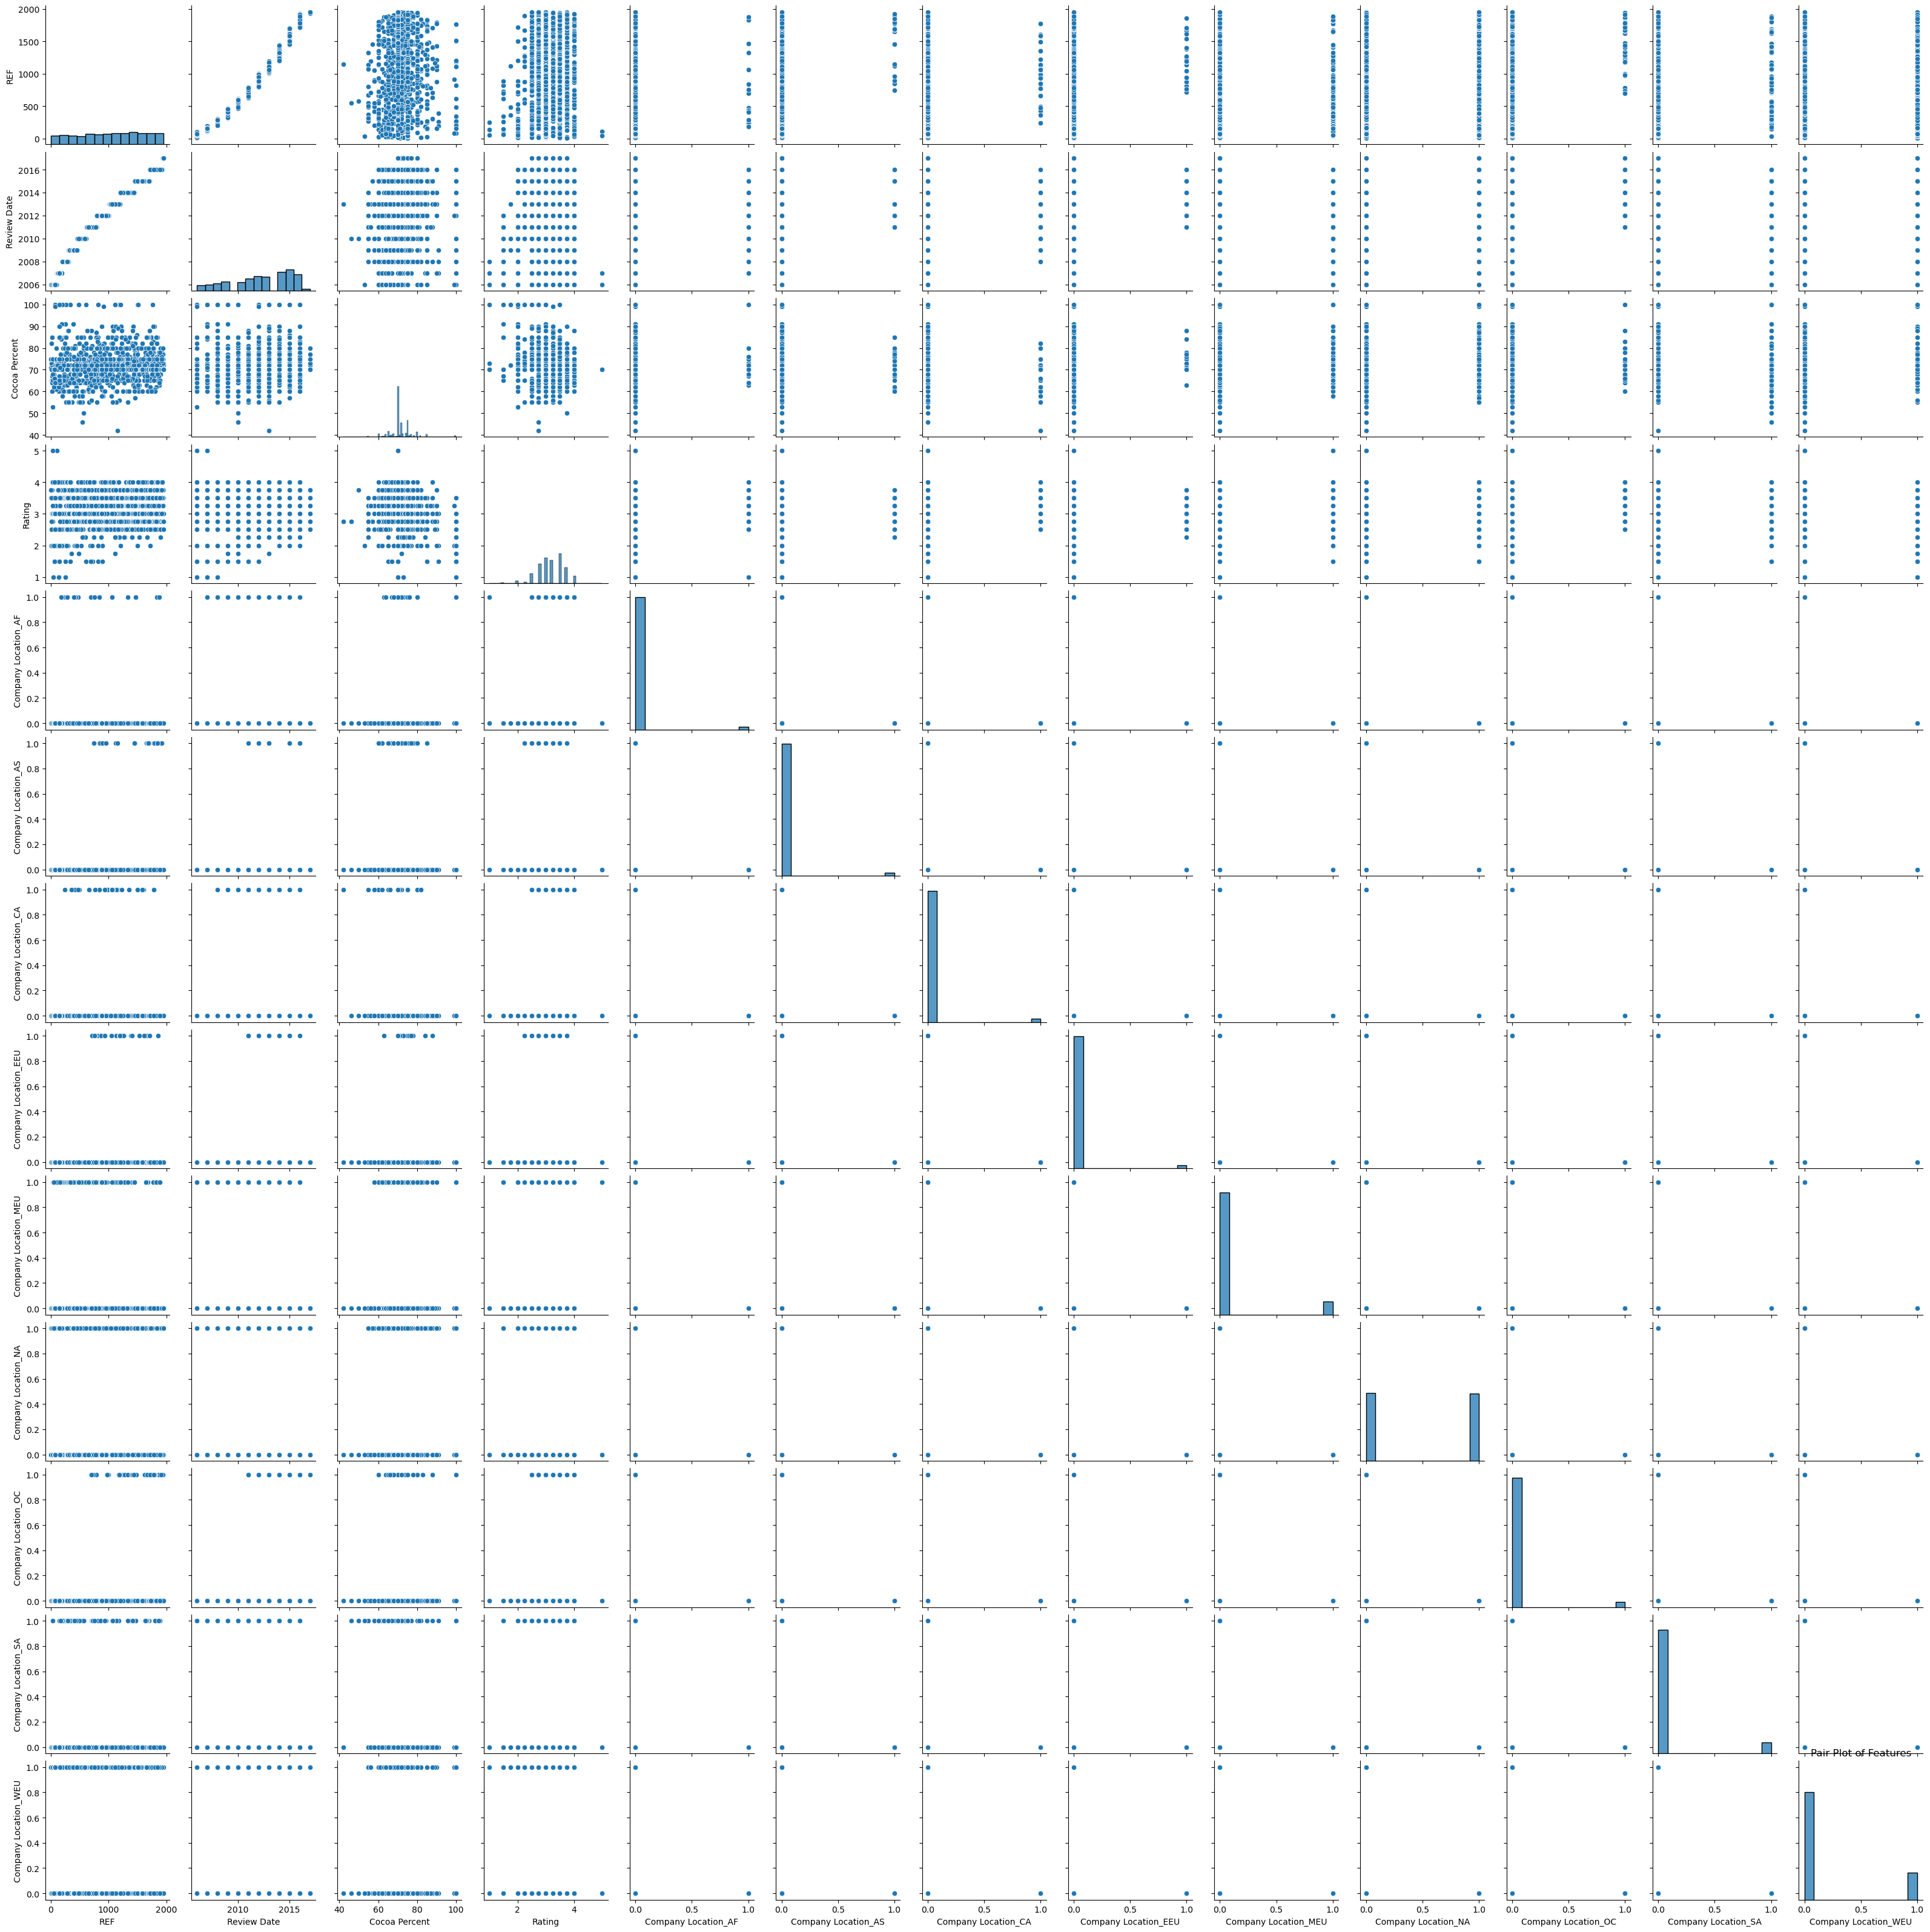

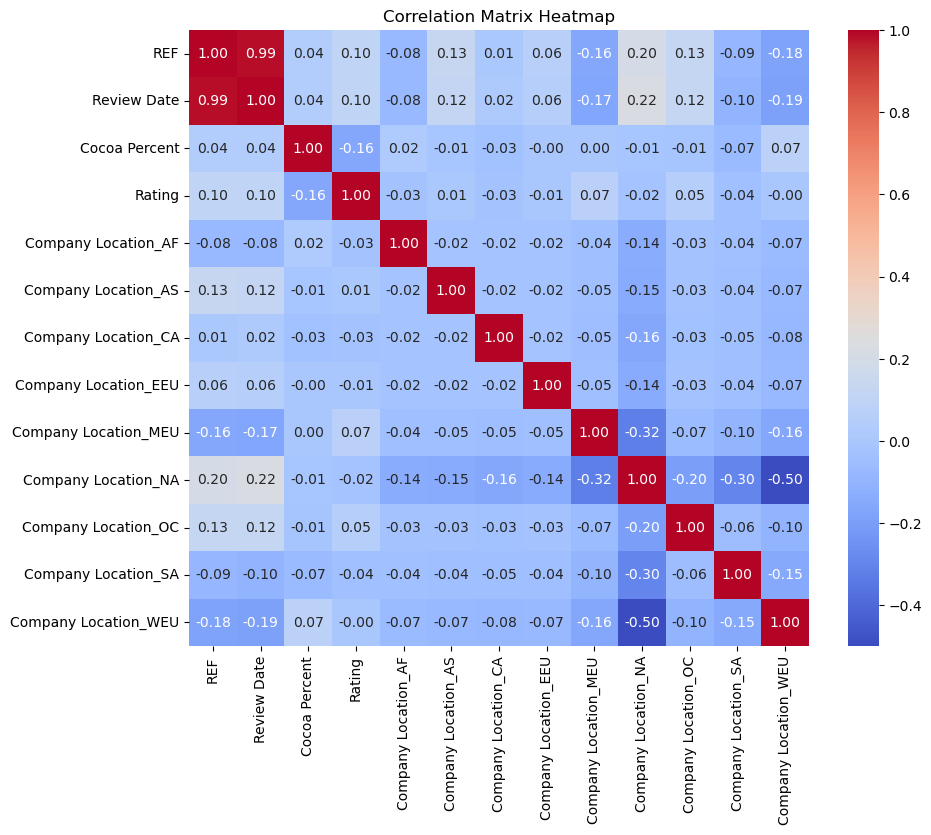

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_encoded)
plt.title('Pair Plot of Features')
plt.show()

# # Visualize the distribution of the Target column according to the count of labels
# print(f'\nTarget Value Counts:\n',  df['Surv_status'].value_counts())
# # Plot a histogram of the values in the 'Target' column
# df['Surv_status'].value_counts().plot(kind='bar')

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()